In [1]:
from inventory_impairment_class import InventoryImpairment
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load data
data = pd.read_excel('./data/inventory_data_new.xlsx')

In [3]:
model = InventoryImpairment()
model.set_forecast_file("./forecast/arima.json")
# Fit the model
model.fit(data, variability=0.5)

Calculating monthly data...
Creating auto arima model...
Creating auto encoder model...



Calculating impairment index...
Model fitted.


In [4]:
# Predict the impairment
impairment = model.predict(tolerance=1.5, threshold='mean')

Mean used as threshold: 0.3630902539815795


In [5]:
model.stock_management()

Recommendation for 114230822.0: Order additional stock (in a quatrimester you won't have any). Projected quatrimestral sales: 280642.16260915523, Current stock: 66500.0, Fair price: 0.06760944194413439
Recommendation for 115030252.0: Reduce stock. Projected sales: 6732.53581021325, Current stock: 23000.0, Fair price: 0.08557922293914952
Recommendation for 115130209.0: Reduce stock. Projected sales: 8273.967317612576, Current stock: 9600.0, Fair price: 0.24180239892126654
Recommendation for 115170581.0: Order additional stock (in a quatrimester you won't have any). Projected quatrimestral sales: 547619.694644864, Current stock: 42000.0, Fair price: 0.06571141811743807
Recommendation for 116211401.0: Order additional stock (in a quatrimester you won't have any). Projected quatrimestral sales: 864835.009196985, Current stock: 36000.0, Fair price: 0.09081277658038432
Recommendation for 116490250.0: Reduce stock. Projected sales: -0.0, Current stock: 26437.0, Fair price: -0.0013753890087394

In [6]:
impairment.head(30)

,material,unitats_2022,vendes_2022,preu_venda_unitari_2022,unitats_2023,vendes_2023,preu_venda_unitari_2023,variacio_unitats_2022_2023,proporcio_variacio_unitats_2022_2023,variacio_vendes_2022_2023,...,diferencia_entrada_sortida,stock_final_2023,valor_total_stock_2023,cost_unitari_stock_2023,impairment_index,auto_arima_index,auto_encoder_index,merged_indexs,fair_price,new_value
0,114230822.0,1018500.0,54892.49,0.053895,885500.0,58951.87,0.066575,-133000.0,-0.130584,4059.38,...,-15.0,66500.0,2292.96,0.034481,0.000000,0.006195,0.211430,0.212050,0.067609,0.034481
1,115030252.0,75900.0,6825.62,0.089929,27600.0,2127.68,0.077090,-48300.0,-0.636364,-4697.94,...,-50.0,23000.0,1777.15,0.077267,0.051069,0.000000,0.127083,0.132190,0.085579,0.077267
2,115070602.0,884000.0,100307.84,0.113470,340000.0,34522.45,0.101537,-544000.0,-0.615385,-65785.39,...,13.0,100000.0,5732.32,0.057323,0.000000,0.000000,0.339448,0.339448,0.095954,0.057323
3,115130209.0,23217.0,5179.48,0.223090,15600.0,3770.68,0.241710,-7617.0,-0.328079,-1408.80,...,13.0,9600.0,2298.10,0.239385,0.007279,0.000000,0.240947,0.241675,0.241802,0.239385
4,115170581.0,357000.0,26188.50,0.073357,1023000.0,74195.50,0.072527,666000.0,1.865546,48007.00,...,13.0,42000.0,2140.13,0.050955,0.000000,0.062567,0.369566,0.375823,0.065711,0.050955
5,116211401.0,180000.0,20998.44,0.116658,1533600.0,156152.48,0.101821,1353600.0,7.520000,135154.04,...,1.0,36000.0,3143.70,0.087325,0.000000,0.059233,0.362196,0.368119,0.090813,0.087325
6,116490250.0,0.0,0.00,0.000000,0.0,0.00,0.000000,0.0,0.000000,0.00,...,2.0,26437.0,2211.43,0.083649,0.000000,0.000000,0.258503,0.258503,-0.001375,-0.001375
7,116490259.0,152600.0,24814.65,0.162612,152600.0,26612.66,0.174395,0.0,0.000000,1798.01,...,5.0,15400.0,1386.79,0.090051,0.000000,0.006245,0.316637,0.317261,0.167623,0.090051
8,118030902.0,711900.0,100467.24,0.141125,741400.0,109717.26,0.147987,29500.0,0.041438,9250.02,...,9.0,56000.0,6892.27,0.123076,0.000000,0.006080,0.295120,0.295728,0.141381,0.123076
9,118030904.0,376560.0,56967.80,0.151285,308000.0,51353.82,0.166733,-68560.0,-0.182069,-5613.98,...,2.0,14700.0,1809.22,0.123076,0.000000,0.016201,0.310358,0.311978,0.158128,0.123076


In [7]:
total_value = 0
count = 0
for index, element in impairment[impairment["fair_price"] == impairment["new_value"]].iterrows():
    total_value += element["valor_total_stock_2023"] - element["stock_final_2023"] * element["fair_price"]
    count += 1
print(f"Valor total devaluat: {total_value}, en un total de {count} elements")

Valor total devaluat: 354976.428753268, en un total de 72 elements


In [8]:
import numpy as np
impairment['depreciation'] = impairment["cost_unitari_stock_2023"]  - impairment["new_value"]

max_depreciation_row = impairment.loc[np.argsort(-impairment['depreciation'], axis=0)[4] ]

print("Element with the most depreciation:")
print(max_depreciation_row)

Element with the most depreciation:
material                                                   135292178.0
unitats_2022                                                  120000.0
vendes_2022                                                    10522.8
preu_venda_unitari_2022                                        0.08769
unitats_2023                                                       0.0
vendes_2023                                                        0.0
preu_venda_unitari_2023                                            0.0
variacio_unitats_2022_2023                                         0.0
proporcio_variacio_unitats_2022_2023                               0.0
variacio_vendes_2022_2023                                          0.0
proporcio_variacio_vendes_2022_2023                                0.0
variacio_preu_venda_unitari_2022_2023                              0.0
proporcio_variacio_preu_venda_unitari_2022_2023                    0.0
data_darrera_entrada                     

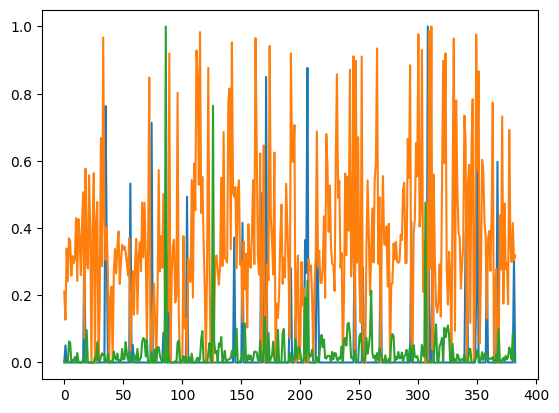

In [9]:
import matplotlib.pyplot as plt
plt.plot(impairment["impairment_index"])
plt.plot(impairment["auto_encoder_index"])
plt.plot(impairment["auto_arima_index"])

In [10]:
# Explain the model
ebm, df, y = model.explain()

Mean Squared Error for the EBM model used to explain the model: 0.08433298613844434


<!-- http://127.0.0.1:7001/2318796099728/ -->

In [11]:
from interpret import show
show(ebm.explain_local(df, y))

<!-- http://127.0.0.1:7001/2318856778640/ -->